# Simple EDA for [Euro-2020-top-players](https://www.kaggle.com/bakar31/euro-2020-top-players) dataset



In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/euro-2020-top-players/euro2020.csv")
df.head(10)

,Player,Country,Position,Match played,Goals,Right foot goals,Left foot goals,Header goals,Assists,Total attempts,...,Top speed,Passing accuracy,Distance covered,Clearence attempted,Balls recovered,Tackels,Blocks,Yellow cards,Red cards,Minutes played
0,Cristiano Ronaldo,Portugal,F,4,5,3.0,2.0,0.0,1.0,16.0,...,29.7,86,36.1,2.0,2.0,1.0,NaN,0.0,0.0,360
1,Patrik Schick,Czech Republic,F,5,5,1.0,3.0,1.0,0.0,16.0,...,32.4,71,43.6,4.0,6.0,3.0,NaN,0.0,0.0,404
2,Karim Benzema,France,F,4,4,2.0,2.0,1.0,0.0,11.0,...,29.5,87,37.1,1.0,4.0,0.0,NaN,0.0,0.0,349
3,Emil Forsberg,Sweden,M,4,4,2.0,2.0,0.0,0.0,14.0,...,29.0,79,41.4,NaN,7.0,NaN,NaN,1.0,0.0,371
4,Romelu Lukaku,Belgium,F,5,4,2.0,2.0,0.0,0.0,13.0,...,31.3,69,40.9,2.0,3.0,0.0,NaN,0.0,0.0,444
5,Harry Kane,England,F,7,4,2.0,0.0,2.0,0.0,15.0,...,30.8,72,74.3,5.0,4.0,3.0,NaN,0.0,0.0,649
6,Xherdan Shaqiri,Switzerland,M,5,3,2.0,1.0,0.0,1.0,12.0,...,29.5,81,42.3,NaN,5.0,NaN,NaN,0.0,0.0,371
7,Raheem Sterling,England,F,7,3,2.0,0.0,1.0,1.0,14.0,...,33.1,84,68.3,1.0,14.0,0.0,NaN,0.0,0.0,641
8,Kasper Dolberg,Denmark,F,4,4,3.0,0.0,0.0,0.0,7.0,...,30.6,70,24.7,2.0,1.0,0.0,NaN,0.0,0.0,225
9,Robert Lewandowski,Poland,F,3,3,1.0,1.0,1.0,0.0,12.0,...,31.3,66,29.7,2.0,2.0,2.0,NaN,1.0,0.0,270


### Summary of the the dataset

In [3]:
summary = pd.DataFrame(df.dtypes, columns=["datatype"])
summary["isnull"] = df.isnull().sum() 
summary["unique"] = df.nunique()
summary["first"] = df.loc[0]
summary["second"] = df.loc[1]
summary["third"] = df.loc[2]
summary

,datatype,isnull,unique,first,second,third
Player,object,0,59,Cristiano Ronaldo,Patrik Schick,Karim Benzema
Country,object,0,18,Portugal,Czech Republic,France
Position,object,1,3,F,F,F
Match played,int64,0,6,4,5,4
Goals,int64,0,6,5,5,4
Right foot goals,float64,2,4,3.0,1.0,2.0
Left foot goals,float64,2,4,2.0,3.0,2.0
Header goals,float64,2,3,0.0,1.0,1.0
Assists,float64,1,5,1.0,0.0,0.0
Total attempts,float64,1,21,16.0,16.0,11.0


# Description of the Columns

* <b> Player</b>: Name of the player
* <b>Country</b>: Players country
* <b>Position</b>: Where the player play
* <b>Match played</b>: How many match played
* <b>Goals</b>: How many goals scored
* <b>Right foot goals</b>: How many goals scored by right foot
* <b>Header goals</b>: How many goals scored by head
* <b>Assists</b>: Number of assists
* <b>Total attempts</b>: Total attempts on goal
* <b>On target</b>: Total attempts on target
* <b>Off target</b>: Total attempts off target
* <b>Woodwork</b>: Total attempts hit the post
* <b>Shot blocks</b>: Number of shot blocked by defender
* <b>Avg gpg</b>: Average goals per game
* <b>Fouls suffered</b>: Total fouls suffered
* <b>Fouls committed</b>: Total fouls committed
* <b>Top speed</b>: Top speed
* <b>Passing accuracy</b>: Passing accuracy
* <b>Distance covered</b>: Total distance covered
* <b>Clearence attempted</b>: Total attempts of clearing the ball
* <b>Balls recovered</b>: Total balls recovered
* <b>Tackles</b>: Total tackles
* <b>Blocks</b>: Total shot blocked
* <b>Yellow cards</b>: Total yellow cards
* <b>Red cards</b>: Total red cards
* <b>Minutes played</b>: Total minutes played

### Length of the data frame

In [4]:
len(df)
# We can see that there are just 59 rows and most of the rows are empty for the column Blocks so let's drop that field. 
# It could also be the case that the null values means that the player did zero blocks but for now let's just drop the field

59

In [5]:
train_df = df.drop("Blocks", axis = 1)

### Let's also impute the null values with zero

In [6]:
train_df = train_df.fillna(axis = 0, value = 0)
# So, in here we have imputed the null values with zero cause that would be the most probable case for value to be null.

In [7]:
len(train_df.columns)

26

### Univariate Analysis

In [8]:
fig, ax = plt.subplots(13,2, figsize=(100,300))
for idx, col in enumerate(train_df.columns.to_list()):
    row_idx = idx//2
    col_idx = idx%2
    sns.countplot(data=train_df, x = col,  color = "red", ax = ax[row_idx, col_idx])

### Observations made :
1. It could be seen that all players are unique so nothing important in the very first plot.
2. It is apparent that in top players, Italy and England have contributed the maximum number of players that is 7😎 while Sweden, Poland and Switerzland have just contributed one player.😐
3. Players with differnt position where most of players play in Middle Infield position.
4. Most of the players have played more than 4 matches and very few who did not play any but still maintained their position in top players.
5. It can be seen that the max goal by any player is 5 and most of the players did 0 goal.😐
6. Max number of right foot goal is 3 while  min being 0.
7. Max left foot goal is again 3 while min is 0
8. max Header goals by any player is 2
9. Assits have a graph which is left skewed
10. The total attempt to goal is 2 by many players while it can be seen that there are players whose total attempt is 20 and that is amazing
11. Most of the players did one attempt of target goal
12. Off target attempts have max value as 9 
13. Most players have hard luck at hitting the post while max hit is 2.
14. The max number of shot blocked by any defender is 6 while most of the defenders were not able to block.
15. The max average goal per game is 1.25 while min being 0.
16. Max fouls suffered by any player is 18 and the data is left skewed
17. Max fouls committed by any player is 12 but the most of the players commited 5 fouls as it can be seen
18. The player having the highest top speed is 33 while average top speed being around 30 with the data being left skewed.
19. The max passing accuracy is around 98% while min being 66%.
20. Total distance covered seem to be unique for alomost all of the players 
21. Maximum number of clearance attempted can be seen to be around 29 and data is seem to be left skewed.
22. Total balls recovered seem to be unique with few ups and downs.
23. The max number of tackels can be seen to be 30
24. The max number of  yellow card received by any player is 3 while there are many players who did not receive any yellow card.
25. Nothing interesting can really be seen.
26. Minutes played do not have uniform distribution.
    

### Top 10 players with max goals

In [9]:
train_df.columns

Index(['Player', 'Country', 'Position', 'Match played', 'Goals',
       'Right foot goals', 'Left foot goals', 'Header goals', 'Assists',
       'Total attempts', 'On target', 'Off target', 'Woodwork', 'Shot blocks',
       'Avg gpg', 'Fouls suffered', 'Fouls committed', 'Top speed',
       'Passing accuracy', 'Distance covered', 'Clearence attempted',
       'Balls recovered', 'Tackels', 'Yellow cards', 'Red cards',
       'Minutes played'],
      dtype='object')

In [10]:
top_players = train_df.sort_values(["Goals"], ascending=False).iloc[:10]
train_df["gpa"] = train_df["Goals"]/train_df["Total attempts"]
attempts = train_df.sort_values(["gpa"], ascending=False).iloc[:10]
agp = train_df.sort_values(["Avg gpg"], ascending=False).iloc[:10]
passing_accuracy = train_df.sort_values(["Passing accuracy"], ascending=False).iloc[:10]
header = train_df.sort_values(["Header goals"], ascending=False).iloc[:10]

### Top players on the basis of total goals.

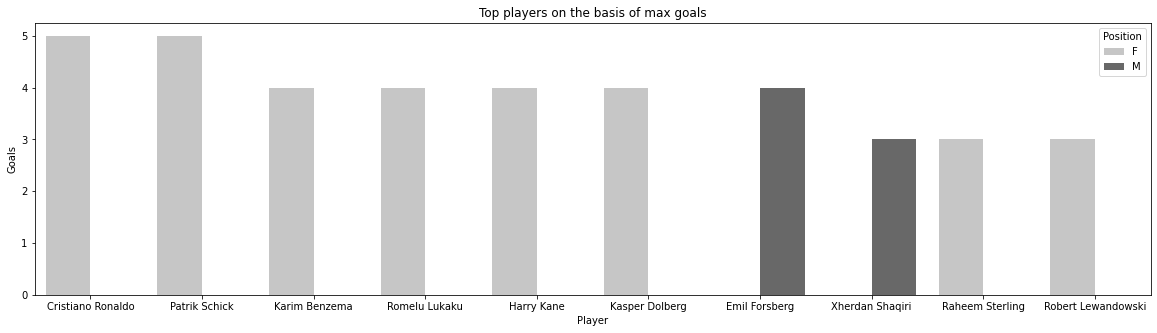

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = top_players, y = "Goals", palette = "Greys", hue = "Position")
plt.title("Top players on the basis of max goals")
plt.show()

### Top players on the basis of average goals per game.

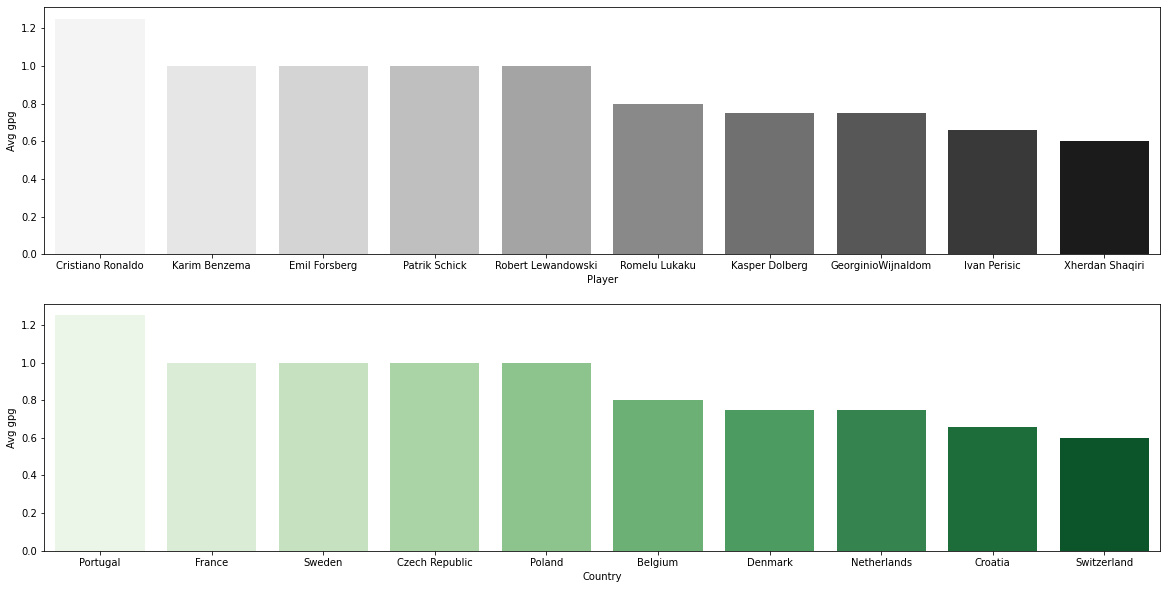

In [12]:
fig, ax = plt.subplots(2, 1,figsize=(20,10))
sns.barplot(x = "Player", data = agp, y = "Avg gpg", palette = "Greys", ax = ax[0])
sns.barplot(x = "Country", data = agp, y = "Avg gpg", palette = "Greens", ax = ax[1])
plt.show()

### Top players with max total goals per attempts.

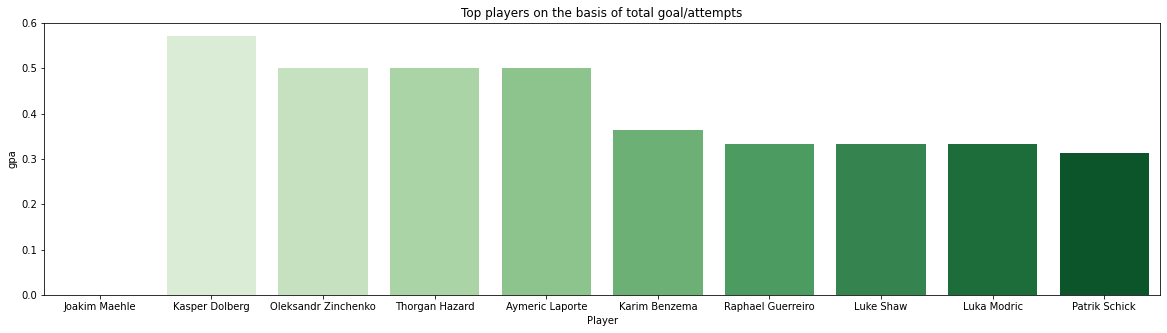

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = attempts, y = "gpa", palette = "Greens")
plt.title("Top players on the basis of total goal/attempts")
plt.show()

### Great at passing.

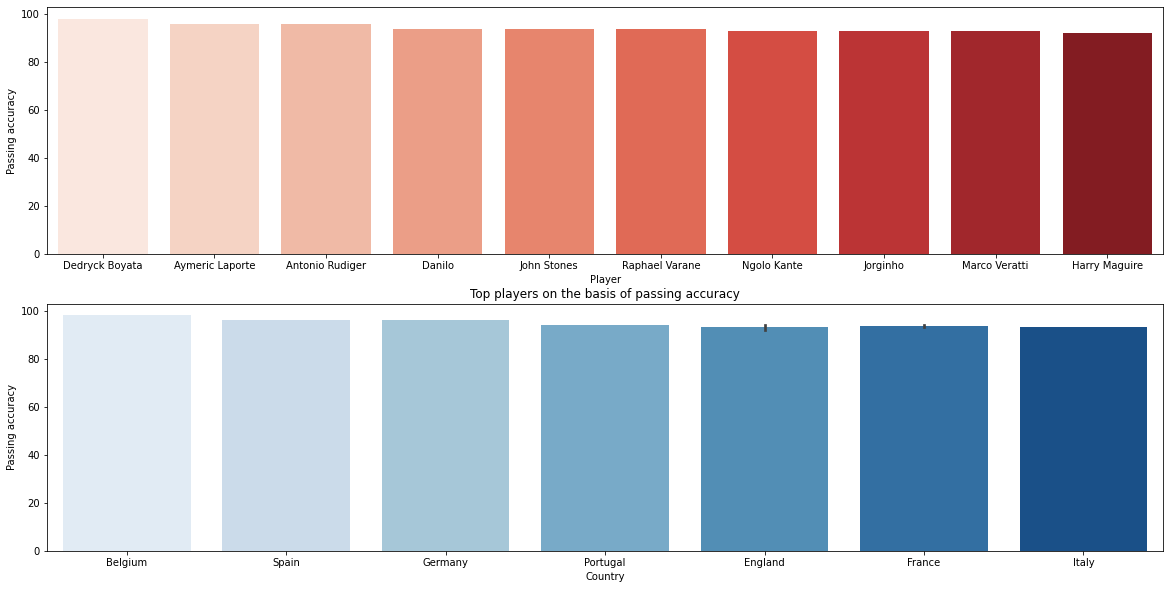

In [14]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.barplot(x = "Player", data = passing_accuracy, y = "Passing accuracy", palette = "Reds", ax = ax[0])
sns.barplot(x = "Country", data = passing_accuracy, y = "Passing accuracy", palette = "Blues", ax = ax[1])
plt.title("Top players on the basis of passing accuracy")
plt.show()

### Header goalers.

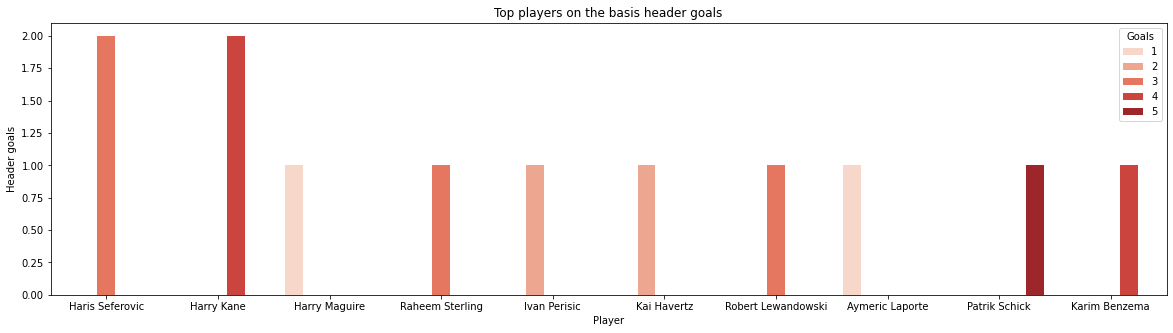

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = header, y = "Header goals", palette = "Reds", hue = "Goals")
plt.title("Top players on the basis header goals")
plt.show()

### Speedy players.

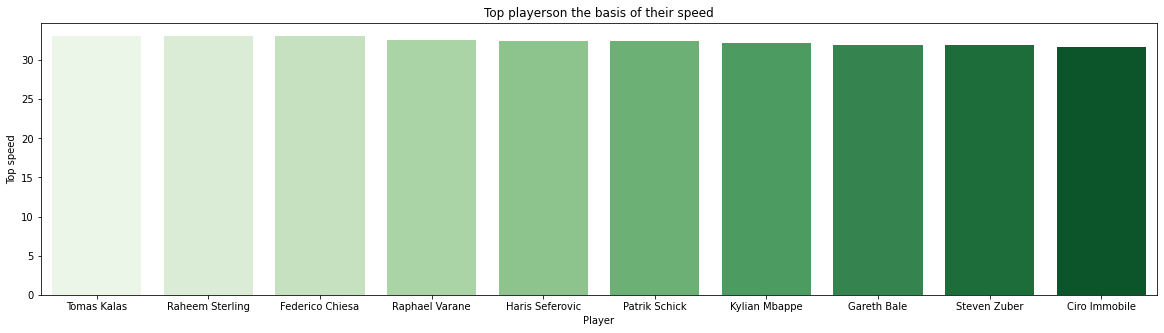

In [16]:
speedy = train_df.sort_values(["Top speed"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = speedy, y = "Top speed", palette = "Greens")
plt.title("Top playerson the basis of their speed")
plt.show()

### Yellow cards receivers.

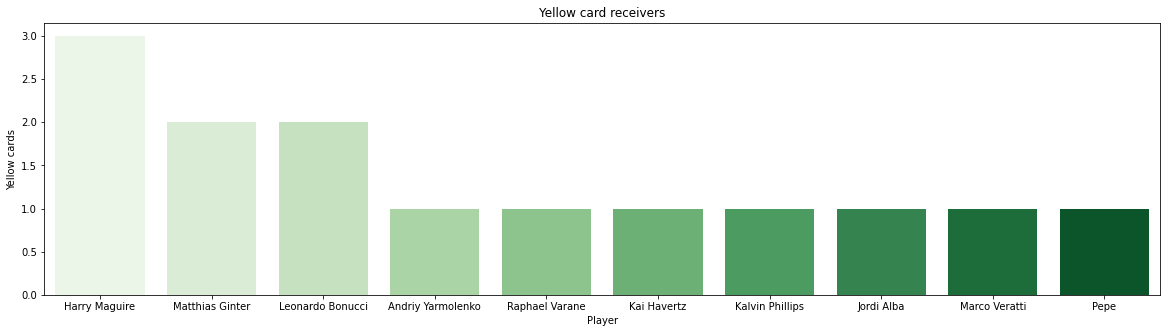

In [17]:
yelloww = train_df.sort_values(["Yellow cards"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = yelloww, y = "Yellow cards", palette = "Greens")
plt.title("Yellow card receivers")
plt.show()

### Shot Blockers

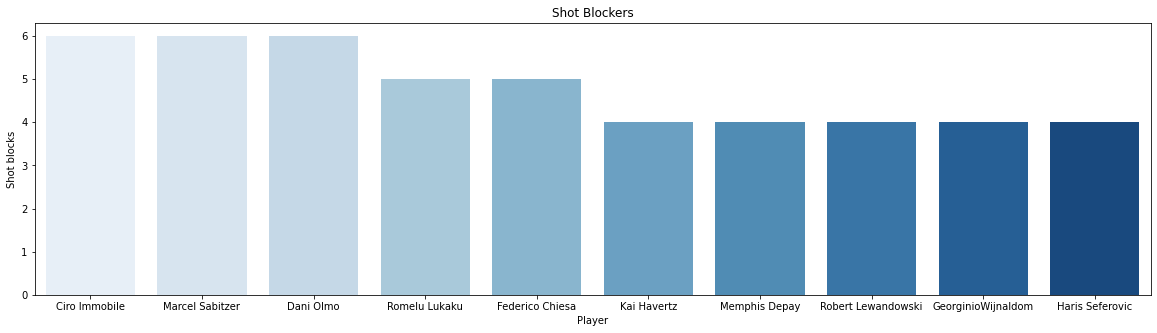

In [18]:
blockers = train_df.sort_values(["Shot blocks"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = blockers, y = "Shot blocks", palette = "Blues")
plt.title("Shot Blockers")
plt.show()

### Matches Played

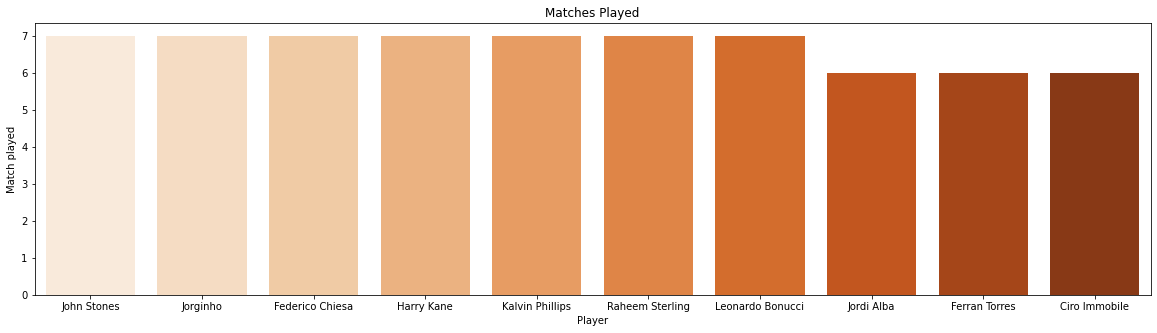

In [19]:
blockers = train_df.sort_values(["Match played"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = blockers, y = "Match played", palette = "Oranges")
plt.title("Matches Played")
plt.show()

### Number of assists

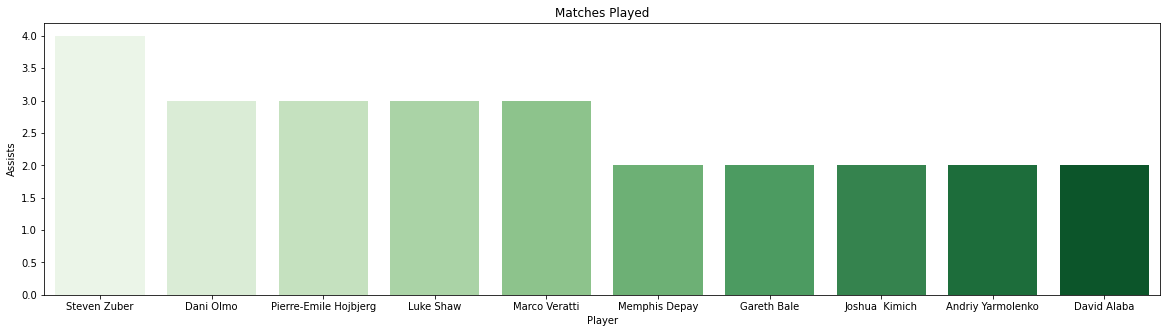

In [20]:
Assisters = train_df.sort_values(["Assists"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = Assisters, y = "Assists", palette = "Greens")
plt.title("Matches Played")
plt.show()

## Let's look at bad perfomers

### Bad at passing

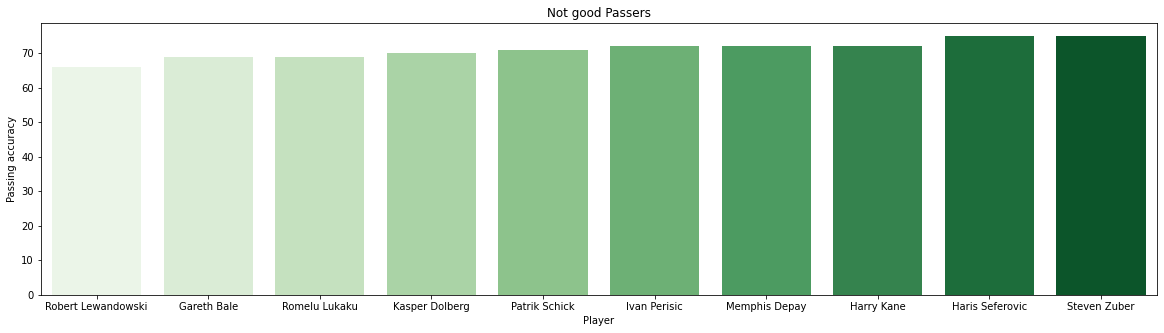

In [21]:
Worst_passers = train_df.sort_values(["Passing accuracy"], ascending=True).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = Worst_passers, y = "Passing accuracy", palette = "Greens")
plt.title("Not good Passers")
plt.show()

### Fouls suffered

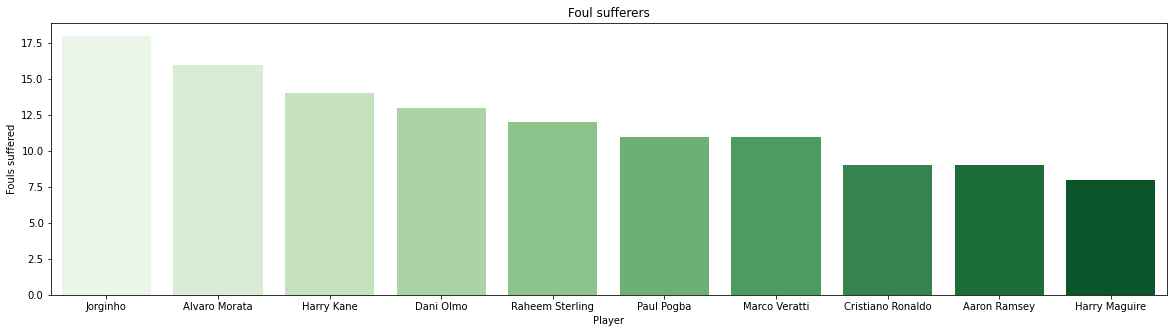

In [22]:
Foulers = train_df.sort_values(["Fouls suffered"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = Foulers, y = "Fouls suffered", palette = "Greens")
plt.title("Foul sufferers")
plt.show()

### Foul Commiters

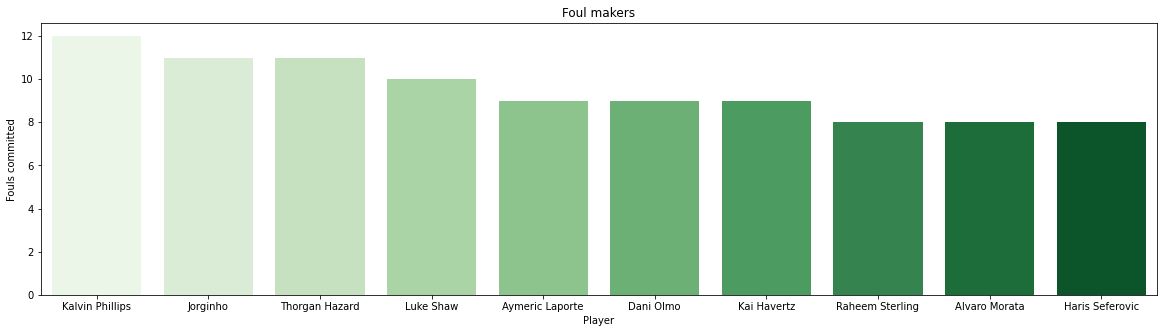

In [23]:
Foulers = train_df.sort_values(["Fouls committed"], ascending=False).iloc[:10]
plt.figure(figsize=(20,5))
sns.barplot(x = "Player", data = Foulers, y = "Fouls committed", palette = "Greens")
plt.title("Foul makers")
plt.show()

### Do let me know if you think I missed some out. your feedback is what will help me learn!📉📊📈
### Do let me know what you think of this notebook in comments!👇
### Happy Learing! 💪💪